<a href="https://colab.research.google.com/github/Liping-LZ/BDAO_DSDO/blob/main/Big_data_analytics_project/Big_data_analytics_in_Google_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome**

We are starting our journey analysing data on Google Cloud. Excited? Hope you enjoy this project as I did.

Never done a big data analytics project? Never done an analytics project on Cloud? Have no ideas at all? Don't worry. I will go through every details with you and take you experience the power of Cloud and Big Data.

Let's do it!

## **1. Business understanding**

We cannot start analytics project without data. Of course we need to collect and gather some data we need. Usually we take data from enterprise system or database. In the company, it is common that there is a data team (more specifically a ETL team) helping us extracting data from system and business database and preparing data for analytics purpose.

In this case, we do not have access to business systems or business database. We will collect and store our own data, and then we process and analyse data.

But how do we know what data we need? Remember the data analytics lifecycle? It always starts with business understanding. This requires us understand the business context and requirements of the stakeholder.

Imagine now you are hired by one AR gaming company. They have launched an AR game called *MonsterQuest*. This game is very similar to Pokémon GO, where players can catch, battle, and train these creatures at real-world locations. Recently the company noticed a decline in player engagement six months post-launch of *MonsterQuest*. The main feedback from players is that the game becomes repetitive, and the distribution of monsters seems random, affecting player satisfaction and retention. The company wants to leverage data analytics to improve player engagement.

By analysing the business problems the company is facing and their need, we understand we need to optimise the placement of monsters with better strategy instead of random placement. With better placement, the users can have more new experience and would stay with the game.

Thus, we could consider collecting data and then use the data to analyse the the relationships between monster attributes (which similar to Pokemon stats) and predict the monster types to optimize monster placement and enhance player experience.


## **2. Data gathering**

Through looking closely into the business case, now we understand what our stakeholders are expecting from this project. We need to better understand the monsters (pokemons) and need to place them with more intentions based on the understanding of the monsters (pokemons).

Thus, we are going to use PokeAPI to collect data and do further analysis on the data and provide insights to the company for further game design optimisation.

Before collecting data, we need to understand what we can have. First, visit https://pokeapi.co/docs/v2 to check the API documentation. In this API, there are 10 main enpoint groups:


*   [Berries](https://pokeapi.co/docs/v2#berries-section)
*   [Contests](https://pokeapi.co/docs/v2#contests-section)
*   [Encounters](https://pokeapi.co/docs/v2#encounters-section)
*   [Evolution](https://pokeapi.co/docs/v2#evolution-section)
*   [Games](https://pokeapi.co/docs/v2#games-section)
*   [Items](https://pokeapi.co/docs/v2#items-section)
*   [Locations](https://pokeapi.co/docs/v2#locations-section)
*   [Machines](https://pokeapi.co/docs/v2#machines-section)
*   [Moves](https://pokeapi.co/docs/v2#moves-section)
*   [Pokémon](https://pokeapi.co/docs/v2#pokemon-section)


Since we need Pokemon data, [Pokémon](https://pokeapi.co/docs/v2#pokemon-section) would be the main enpoint group we would use to collect data. In this enpoint group, there are various endpoints:


*   [Abilities](https://pokeapi.co/docs/v2#abilities)
*   [Characteristics](https://pokeapi.co/docs/v2#characteristics)
*   [Egg Groups](https://pokeapi.co/docs/v2#egg-groups)
*   [Genders](https://pokeapi.co/docs/v2#genders)
*   [Growth Rates](https://pokeapi.co/docs/v2#growth-rates)
*   [Natures](https://pokeapi.co/docs/v2#natures)
*   [Pokeathlon Stats](https://pokeapi.co/docs/v2#pokeathlon-stats)
*   [Pokemon](https://pokeapi.co/docs/v2#pokemon)
*   [Pokemon Location Areas](https://pokeapi.co/docs/v2#pokemon-location-areas)
*   [Pokemon Colors](https://pokeapi.co/docs/v2#pokemon-colors)
*   [Pokemon Forms](https://pokeapi.co/docs/v2#pokemon-forms)
*   [Pokemon Habitats](https://pokeapi.co/docs/v2#pokemon-habitats)
*   [Pokemon Shapes](https://pokeapi.co/docs/v2#pokemon-shapes)
*   [Pokemon Species](https://pokeapi.co/docs/v2#pokemon-species)
*   [Stats](https://pokeapi.co/docs/v2#stats)
*   [Types](https://pokeapi.co/docs/v2#types)

Ideally, we should integrate data from different perspectives through these enpoints, such as location, abilities, egg groups, stats, types. However, given this is the first exploration. We will run a pilot project first to see how it goes. In the future, we could consider expand the data source and data amount to further improve the analytics capability.

In this pilot project, we will use [Pokemon](https://pokeapi.co/docs/v2#pokemon) enpoint. The enpoint is `GET` [https://pokeapi.co/api/v2/pokemon/{id or name}/]().

Through this endpoint, the data we can get is as shown below:![picture](https://drive.google.com/uc?id=186cEn7suUgjOHmZf82YJVE4AN5_iVYhh)

This looks pretty good. We can get stats, type, and some basic information of the pokemons. Next we will find a way to get all these pokemon information at scale. If we pay attention to the endpoint, we would see we can input id or name to get the pokemon information. If we need multiple pokemon information, we can just create a list of id or names and then write a for loop to make multiple requests to get the data. The pokemon id in this API are just integers starting from 1. Thus, the easiest way for us to get a large amount of pokemon data at once through [Pokemon](https://pokeapi.co/docs/v2#pokemon) enpoint is we loop the integers within a range as pokemon id and then make request to retrieve data.

Here is the codes and explanation of codes:


```
base_url = "https://pokeapi.co/api/v2/" # This is the base url of pokeapi
num_pokemon = 100 # We set the number of pokemon data we want to collect

# Then we create an empty list to store the pokemon data we retrieve through API
pokemon_data = []

# The following is the "for loop" we use to make multiple requests with different urls.
# range(1, num_pokemon +1) is used to loop from 1 to 1001, so we will get 1000 pokemons in the end.
# url = f"{base_url}pokemon/{i}" is used to create the endpoints with different id. We use f format to call the base url and each pokemon id.
# requests library is used to make request.
# to better tackle with requests errors, we create conditional statements to tell us whether the reponse is successful or not (200 is successful reponse code). If it is successful, we will get all the pokemon data in this endpoint and store it into the empty list we created. If it fails to retrieve data, we print out the message.


for i in range(1, num_pokemon + 1):
    url = f"{base_url}pokemon/{i}"
    response = requests.get(url)
    
    if response.status_code == 200:
        pokemon = response.json()
        pokemon_data.append(pokemon)
    else:
        print(f"Failed to retrieve data for Pokemon ID: {i}")
```




In [ ]:
import requests

# Extract data from the PokeAPI
base_url = "https://pokeapi.co/api/v2/"
num_pokemon = 1000

pokemon_data = []

for i in range(1, num_pokemon + 1):
    url = f"{base_url}pokemon/{i}"
    response = requests.get(url)

    if response.status_code == 200:
        pokemon = response.json()
        pokemon_data.append(pokemon)
    else:
        print(f"Failed to retrieve data for Pokemon ID: {i}")

Note: since we are making 1000 requests to get data, it takes a bit longer time to retrieve data.

Here we test whether our data is as we expect.



```
len(pokemon_data) # This is to get the length of data, so we know how many pokemon data we retrieve
pokemon_data[0] # This is to check the data we get using one example.
list(pokemon_data[0].keys()) # This is to get all the fields we retrieve from the endpoint.
```



In [ ]:
len(pokemon_data)

1000

In [ ]:
pokemon_data[0]

{'abilities': [{'ability': {'name': 'overgrow',
    'url': 'https://pokeapi.co/api/v2/ability/65/'},
   'is_hidden': False,
   'slot': 1},
  {'ability': {'name': 'chlorophyll',
    'url': 'https://pokeapi.co/api/v2/ability/34/'},
   'is_hidden': True,
   'slot': 3}],
 'base_experience': 64,
 'cries': {'latest': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/latest/1.ogg',
  'legacy': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/legacy/1.ogg'},
 'forms': [{'name': 'bulbasaur',
   'url': 'https://pokeapi.co/api/v2/pokemon-form/1/'}],
 'game_indices': [{'game_index': 153,
   'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}},
  {'game_index': 153,
   'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}},
  {'game_index': 153,
   'version': {'name': 'yellow',
    'url': 'https://pokeapi.co/api/v2/version/3/'}},
  {'game_index': 1,
   'version': {'name': 'gold', 'url': 'https://pokeapi.co/api/v2/versio

In [ ]:
list(pokemon_data[0].keys())

['abilities',
 'base_experience',
 'cries',
 'forms',
 'game_indices',
 'height',
 'held_items',
 'id',
 'is_default',
 'location_area_encounters',
 'moves',
 'name',
 'order',
 'past_abilities',
 'past_types',
 'species',
 'sprites',
 'stats',
 'types',
 'weight']

## **3. Data ingestion & Data storage**

Now that we get all the data, we can consider store it somewhere. Given it contains lots of information and we are not sure how we will use the data yet, we can load the data into cloud. And then we can get the data whenever we want without making requests to the API again to get the data. Regarding the data format is json file instead of simple tabular data, the easy way is to load the data somewhere without any transformation. And then we will send the data to the data warehouse, where we can query data and do analysis.

Here are the steps we ingest and load data:


1.   Use `Google Cloud Storage` to load the original data we collect from API.
2.   Then transform the data into a suitable format and load it from `Google Cloud Storage` to `Google BigQuery` (data warehouse).

Both `Google Cloud Storage` and `BigQuery` provide REST API to access the service remotely. In this project, we will call the API and load the data through API. Before we start, we need to make sure we have enable APIs.

Visit API library in Google Cloud, search for "BigQuery" and "Cloud Storage".

![picture](https://drive.google.com/uc?id=1gB7wyX2QI3Cx7Ji1vKGznpVJeqTvX5OP)



Then make sure you have enabled the API. If not, just click "Enable" to enabale the APIs. The below is the example of BigQuery API:

![picture](https://drive.google.com/uc?id=1RPjJ6nKEMZsrJ9pI92ogH8NDwhJZNKz5)



### 3.1 Install libraries/packages

In order to call API in Google Colab, we need to first install `google-cloud-storage` and `google-cloud-bigquery`

In [ ]:
!pip install requests google-cloud-storage google-cloud-bigquery

### 3.2 Authentication

To connect with API and interact with Google Cloud Storage and Google BigQuery, we need to get authentication. In Google colab, we can run the below codes to grant the access directly. Once we run the code, we will be redirected to another page where we are asked whether we allow this notebook to access your Google credentials. You need to make sure you are using the same google account for both Google Colab and Google Cloud. Or the anuthentication might fail.



```
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()
```



![picture](https://drive.google.com/uc?id=1cpZXQ6zGwaUPHNjZNgkGNWLqVjkr3IJw)

![picture](https://drive.google.com/uc?id=1FGTDlBn9KzYe-Wo04pHbY9V_8X0CvxN-)

![picture](https://drive.google.com/uc?id=1JVdROtj2DaSYomkhvwV727niecFioVts)

![picture](https://drive.google.com/uc?id=1ZU00mPK1eaAWBAUnw_VQ5teAbWOOx1fh)

![picture](https://drive.google.com/uc?id=1a3sRpjQM7yhGnLkJiZ4R404PM1hXELNu)





In [1]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

Optionally, you can set up a service account and then download the key file and upload key file to google colab, and then call the key file using the below code.

```
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "key_file"
```


### 3.3 Import libraries

Once we gain the API credentials, we will need to import the libraries. Since the data we retrieve from API is json data format, we will import `json` library as well to be able to deal with json data.

In [2]:
# Import the necessary libraries
import json
from google.cloud import storage
from google.cloud import bigquery

### 3.4 Create a project in Google Cloud

We are managing all resources within one project. Before we load data into Cloud Storage and BigQuery, we need to set up a project first. You could use the existing project, but here we recommend you to create a new project. Once you create the project, you need to save the **project id**, which we will use later.

![picture](https://drive.google.com/uc?id=18bayQbOjHw8Uq-QkMwYhupi8FPtT9Dmm)


### 3.5 Create bucket in Google Cloud Storage

Before we load data into Cloud Storage, we need to create a bucket. We can log into the Google Cloud Console and then go to Cloud Storage page and create bucket manually. In this case, we will use API to create bucket directly.

Here we create a function called `create_bucket`:



```
storage_client = storage.Client(project=project_id) # This is to set up credentials
bucket = storage_client.bucket(bucket_name) # This is to set up the bucket name
new_bucket = storage_client.create_bucket(bucket, location="US")
# This is to create bucket and set up region
# "US" means multi-region in the US, you can also set "EU" or "ASIA" for multi-region in the Europe and Asia
```




In [ ]:
def create_bucket(bucket_name, project_id):
    """Create a new bucket in specific location with storage class"""
    storage_client = storage.Client(project=project_id)
    bucket = storage_client.bucket(bucket_name)
    new_bucket = storage_client.create_bucket(bucket, location="US")  # You can change the location

    print(f"Bucket {new_bucket.name} created.")

# Replace 'your-bucket-name' with your desired bucket name and 'your-project-id' with your Google Cloud project ID
create_bucket('your-bucket-name', 'your-project-id')

Bucket pokemon-test created.


### 3.6 Load the API data into Cloud Storage

Now everything is set up, we can start loading data into Cloud Storage. We need to tell the bucket name, you can just input the bucket you just created in the previous step. And then we need to point the data we are loading. Here `blob` is an object which refers to unstructured data files stored in cloud-based storage services. Remember the list where we store the API data? And the retrieve data is json (though stored in a list), so we will just call it "pokemon_data.json".



```
# These codes are calling API and define the bucket and the data file

storage_client = storage.Client()
bucket = storage_client.bucket(bucket_name)
blob = bucket.blob(blob_name)
```



```
# Because earlier we store the data into the list, it is not a standard format of json.
# Here we transform the data into newline-delimited json file.

json_data = "\n".join(json.dumps(pokemon) for pokemon in pokemon_data)
```



In [ ]:
# Store the extracted data in Google Cloud Storage
# Replace 'your-bucket-name' with your bucket name
bucket_name = "your-bucket-name"
blob_name = "pokemon_data.json"

storage_client = storage.Client()
bucket = storage_client.bucket(bucket_name)
blob = bucket.blob(blob_name)

# Convert the Pokemon data list to newline-delimited JSON
json_data = "\n".join(json.dumps(pokemon) for pokemon in pokemon_data)

blob.upload_from_string(json_data)

print(f"Data uploaded to Google Cloud Storage: gs://{bucket_name}/{blob_name}")

Data uploaded to Google Cloud Storage: gs://pokemon-test/pokemon_data.json


Here we can see the data has been loaded into Cloud Storage and the uri is `gs://pokemon-test/pokemon_data.json`. This uri will be used to call the data. We can also visit Google Cloud Console to check the data and download the data.

### 3.7 Create a dataset in Google BigQuery

We need to know where to load the data in BigQuery. Of course we can use the existing dataset, just go to the console and copy the dataset name. Here we will create a new dataset to store the data we want. To create a new dataset, we write a function to make connection to BigQuery API, set up dataset info and then create dataset.



```
# Initializes a BigQuery client
client = bigquery.Client(project=project_id)

```


```
# Constructs a dataset reference and the dataset object
# Sets the location for the dataset (optional but recommended)

dataset_ref = bigquery.DatasetReference(project_id, dataset_id)
dataset = bigquery.Dataset(dataset_ref)
dataset.location = location
```


```
# Creates the dataset in your specified project

created_dataset = client.create_dataset(dataset, timeout=30)
```

In [ ]:
def create_dataset(project_id, dataset_id, location="US"):
    client = bigquery.Client(project=project_id)
    dataset_ref = bigquery.DatasetReference(project_id, dataset_id)
    dataset = bigquery.Dataset(dataset_ref)
    dataset.location = location

    created_dataset = client.create_dataset(dataset, timeout=30)  # Waits 30 seconds
    print("Dataset {} created.".format(created_dataset.dataset_id))

# Usage
create_dataset('your-project-id', 'your-new_datatset-name') # Replace 'your-project-id' with your Google Cloud project ID and 'your-new-datatset-name' with your desired dataset name

Dataset test_dataset created.


### 3.8 Load the data from Cloud Storage to BigQuery

Ho! Finally we are loading data to BigQuery, the last step before analysis!

Here we define the project and dataset where we are loading data to. And we create a table to store our pokemon data.

The below is the explanation for the codes:



```
# Initializes a BigQuery client

bigquery_client = bigquery.Client(project=project_id)
```


```
# Constructs a dataset reference
# Construct a reference to a specific table within the dataset

dataset_ref = bigquery_client.dataset(dataset_name)
table_ref = dataset_ref.table(table_name)
```



```
# This is to configure our data loading.
# Here we use autodetect to detect the schema automatically
# And define tell the data we are loading is newline-delimited json file

job_config = bigquery.LoadJobConfig()
job_config.autodetect = True
job_config.source_format = bigquery.SourceFormat.NEWLINE_DELIMITED_JSON
```



```
# Here we load the data from Cloud storage and store it into the table we set up
# The load_job.result() method is used to wait for the load job to complete and to check the final status of the job.

load_job = bigquery_client.load_table_from_uri(
    f"gs://{bucket_name}/{blob_name}",
    table_ref,
    job_config=job_config
)

load_job.result()
```

In [ ]:
# Load the data into BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "your-project-id"
dataset_name = "your-dataset-name"
table_name = "pokemon_data"

bigquery_client = bigquery.Client(project=project_id)

dataset_ref = bigquery_client.dataset(dataset_name)
table_ref = dataset_ref.table(table_name)

job_config = bigquery.LoadJobConfig()
job_config.autodetect = True
job_config.source_format = bigquery.SourceFormat.NEWLINE_DELIMITED_JSON

load_job = bigquery_client.load_table_from_uri(
    f"gs://{bucket_name}/{blob_name}",
    table_ref,
    job_config=job_config
)

load_job.result()

print(f"Data loaded into BigQuery: {project_id}.{dataset_name}.{table_name}")

Data loaded into BigQuery: big-synthesizer-421522.test_dataset.pokemon_data


### 3.9 Fetch table and check the schema

Once we load the data to table in BigQuery, we need to check our table. Here we use API to fetch table and print the schema of the table. This will be useful for us to better understand the data.

In [ ]:
# API Request: Fetch the table
table = bigquery_client.get_table(table_ref)

# Print the schema
for schema_field in table.schema:
    print(f'Field: {schema_field.name}, Type: {schema_field.field_type}, Mode: {schema_field.mode}')

Field: weight, Type: INTEGER, Mode: NULLABLE
Field: types, Type: RECORD, Mode: REPEATED
Field: stats, Type: RECORD, Mode: REPEATED
Field: sprites, Type: RECORD, Mode: NULLABLE
Field: species, Type: RECORD, Mode: NULLABLE
Field: past_abilities, Type: RECORD, Mode: REPEATED
Field: name, Type: STRING, Mode: NULLABLE
Field: order, Type: INTEGER, Mode: NULLABLE
Field: moves, Type: RECORD, Mode: REPEATED
Field: id, Type: INTEGER, Mode: NULLABLE
Field: past_types, Type: RECORD, Mode: REPEATED
Field: held_items, Type: RECORD, Mode: REPEATED
Field: height, Type: INTEGER, Mode: NULLABLE
Field: game_indices, Type: RECORD, Mode: REPEATED
Field: base_experience, Type: INTEGER, Mode: NULLABLE
Field: forms, Type: RECORD, Mode: REPEATED
Field: abilities, Type: RECORD, Mode: REPEATED
Field: cries, Type: RECORD, Mode: NULLABLE
Field: location_area_encounters, Type: STRING, Mode: NULLABLE
Field: is_default, Type: BOOLEAN, Mode: NULLABLE


Here we see `Field`, `Type` and `Mode`.

**Field** is the field name;

**Type** is the format/data type of the field;

**Mode** is a description of the field. The below are the three common modes:


*   *Nullable* - Column allows NULL values (default)
*   *Required* - NULL values are not allowed
*   *Repeated* - Column contains an array of values of the specified type


## **4. Data query**

Before data analysis, we need to select the data we need because the original data is mixed with relevant and irrelevant data. Once we get the data, we need some data pre-processing and make sure the data format is fitting our need of analysis.

### 4.1 Data query in BigQuery

In the company, often we need to query data before data analysis. It is common for data anlyst to query data from the data warehouse. In this case, our data is also stored in data warehouse, and we will try to get the data we want through query.

Before we start the query, we need to go through some SQL basics.

#### 4.1.1 SQL basics

SQL (Structured Query Language) is a standard language for storing, manipulating, and retrieving data in relational databases. It is an essential skill for anyone working with data.


Basic SQL Concepts:

Database: A collection of data stored in a structured format.

Table: A structure that stores data in rows and columns.

Column: A specific category of data within a table.

Row: A single record or entry in a table.

Usually we need to create table using SQL before we do data query. But in this case, the database is the dataset we create in BigQuery; Table is the table where we load the data; And there are columns (fields) and rows. Thus, we will focus on data query using SQL.


To query data, we need to understand the basic syntax for query:


*   The `SELECT` statement: Querying data

    ```
    # Here shows how we retrieve the entire table using SELECT

    SELECT * FROM `project_id.dataset_name.table_name`;

    # We can also just retrieve specific column(s) using SELECT

    SELECT column1, column2 FROM `project_id.dataset_name table_name`;
    ```

*    The `WHERE` statement: Filtering data

    ```
    # Here we set conditions to query data

    SELECT * FROM `project_id.dataset_name.table_name`
    WHERE column2 > 25;
    ```
*   The `ORDER BY` statement: Sorting data

    ```
    # Here we set conditions to query data

    SELECT column1, column2
    FROM `project_id.dataset_name.table_name`
    ORDER BY column1 DESC, column2 ASC;
    ```
*   The `COUNT()`, `SUM()`, `AVG()`, `MIN()`, and `MAX()` statement: Aggregating data

    ```
    # Here we count the table and save it as a field called total_rows

    SELECT COUNT(*) AS total_rows FROM `project_id.dataset_name.table_name`;
    ```
*   The `GROUPBY` statement: Grouping data
    ```
    # Here we return column1 and sum value of column2 grouped by column1

    SELECT column1, SUM(column2) AS total
    FROM `project_id.dataset_name.table_name`
    GROUP BY column1;
    ```
*   The `JOIN` statement: Joining data
    ```
    # Here we join two tables from the database based on id

    SELECT *
    FROM `project_id.dataset_name.table1` t1
    JOIN `project_id.dataset_name.table2` t2
    ON t1.column_id = t2.column_id;

    # of course, we can also retrive different parts of data in one table and then join them.
    ```
*   The `LIMIT` statement: Retrieving only a specific number of rows
    ```
    # Here we only retrn 10 rows of data.

    SELECT * FROM `project_id.dataset_name.table_name`
    LIMIT 10;
    ```  

*   The `WITH` statement: Defining named subqueries within a larger query
    ```
    # In this example, the WITH statement defines a subquery named sales_by_country that calculates the total sales for each country.
    # The main query then selects the country and total sales from the subquery, filters for countries with total sales greater than 1,000,000, and orders the results by total sales in descending order.

    WITH sales_by_country AS (
      SELECT country, SUM(sales) AS total_sales
      FROM `project_id.dataset_name.sales_table`
      GROUP BY country
    )
    SELECT country, total_sales
    FROM sales_by_country
    WHERE total_sales > 1000000
    ORDER BY total_sales DESC;
    ```

#### 4.1.2 First query to test

First initialise the credidentials and make connection to the data (table) in BigQuery.

In [5]:
from google.cloud import bigquery

# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "big-synthesizer-421522"
dataset_name = "pokemon_data"
table_name = "pokemon_data"

bigquery_client = bigquery.Client(project=project_id)

Then we write the query using SQL. Here we try to retreive id, name, height, weight of pokemons and we only get data of 10 pokemons. The `query_job.result()` is used to get the data.

Since the data is written in rows, we use for loop to read each row and define the fileds and print the data we retrieved.

In [ ]:
# Query the data in BigQuery
query = f"""
    SELECT id, name, height, weight
    FROM `{project_id}.{dataset_name}.{table_name}`
    LIMIT 10
"""

query_job = bigquery_client.query(query)
results = query_job.result()

print("Query Results:")
for row in results:
    print(f"ID: {row['id']}, Name: {row['name']}, Height: {row['height']}, Weight: {row['weight']}")

Query Results:
ID: 329, Name: vibrava, Height: 11, Weight: 153
ID: 330, Name: flygon, Height: 20, Weight: 820
ID: 337, Name: lunatone, Height: 10, Weight: 1680
ID: 338, Name: solrock, Height: 12, Weight: 1540
ID: 343, Name: baltoy, Height: 5, Weight: 215
ID: 344, Name: claydol, Height: 15, Weight: 1080
ID: 351, Name: castform, Height: 3, Weight: 8
ID: 358, Name: chimecho, Height: 6, Weight: 10
ID: 380, Name: latias, Height: 14, Weight: 400
ID: 381, Name: latios, Height: 20, Weight: 600


We can also put the retrieved data into dataframe using `query_job.to_dataframe()`, which can be benefical for us to do further analysis in Python.

In [ ]:
test = query_job.to_dataframe()
test.head()

id      name  height  weight
0  329   vibrava      11     153
1  330    flygon      20     820
2  337  lunatone      10    1680
3  338   solrock      12    1540
4  343    baltoy       5     215

#### 4.1.3 Query data for analysis

Now that we have stored data properly in the data warehouse and we have tested the query successfully, we will start collecting the data we need for analysis and solving the issues we mentioned earlier in the business analysis part.

The company clearly doesn't have very good understanding of pokemon characteristics and statistics. This is the main reason why they failed to place monsters with good diversity to give players good experience. We need to find out the right data and analyse the data for them.

Before that, we need to make sure we understand the data and its context first. Bulbagarden is a very good website to better understand the data and context. For example, through [this link](https://bulbapedia.bulbagarden.net/wiki/Pok%C3%A9mon_(species)) we can better understand pokemon. Here is the introduction to Pokemon from this website:

"There are currently 1025 known Pokémon species that inhabit the Pokémon world. They take up many shapes and sizes, resembling animals and living creatures in the real world. However, they possess several fantastic powers not demonstrated by most real animals, including the manipulation of aspects of the material world, such as electricity or fire, each having their own type and categories. It is implied that there are more Pokémon always waiting to be discovered beyond the current count."

This [link](https://bulbapedia.bulbagarden.net/wiki/Type) explains types of pokemon;

This [link](https://bulbapedia.bulbagarden.net/wiki/Stat) explains stats of pokemon.

Basically types (Japanese: タイプ Type) are properties applied to Pokémon and their moves, which affect the power of moves in battles. , while a stat (Japanese: 能力 ability) refers to any of several parameters pertaining to Pokémon that can affect turn order, move success, and damage output during a battle.

Except for types and stats, there are some other basic data, such weight, height that can be considered in this case as well.

Thus, in this analysis, we will analyse the key features of the pokemons, such as height, weight, stats, types. By combining descriptive analytics and machine learning modelling, we will aim to have better understanding of features and how features are corrected with each other.

Under such context, here are the potential data fields we are extracting from the data warehouse:


*   id
*   name
*   height
*   weight
*   types
*   base stats (skills)

Before starting the query, we need to further check the data structure and understand how we should make the query.

In the previous check, we have checked the schema of the table as shown below:

Field: weight, Type: INTEGER, Mode: NULLABLE

Field: types, Type: RECORD, Mode: REPEATED

Field: stats, Type: RECORD, Mode: REPEATED

Field: sprites, Type: RECORD, Mode: NULLABLE

Field: species, Type: RECORD, Mode: NULLABLE

Field: past_abilities, Type: RECORD, Mode: REPEATED

Field: name, Type: STRING, Mode: NULLABLE

Field: order, Type: INTEGER, Mode: NULLABLE

Field: moves, Type: RECORD, Mode: REPEATED

Field: id, Type: INTEGER, Mode: NULLABLE

Field: past_types, Type: RECORD, Mode: REPEATED

Field: held_items, Type: RECORD, Mode: REPEATED

Field: height, Type: INTEGER, Mode: NULLABLE

Field: game_indices, Type: RECORD, Mode: REPEATED

Field: base_experience, Type: INTEGER, Mode: NULLABLE

Field: forms, Type: RECORD, Mode: REPEATED

Field: abilities, Type: RECORD, Mode: REPEATED

Field: cries, Type: RECORD, Mode: NULLABLE

Field: location_area_encounters, Type: STRING, Mode: NULLABLE

Field: is_default, Type: BOOLEAN, Mode: NULLABLE

For `id`, `name`, `weight`, `height`, we can call directly. However, we have noticed the fileds like tyeps and stats are `RECORD` type, that means this field has nested fields. And the nested fields are not shown in the returned schema, so we will write another program to get a schema with showing further level of fields, so we will understand better how we can query tyeps data and stats data.



```
# We use the following code to get all fields under the "RECORD" field.

for field in fields:
    print(" " * level * 2 + f"{field.name} ({field.field_type})")
    if field.field_type == 'RECORD':
        print_schema(field.fields, level + 1)
```



In [ ]:
table = bigquery_client.get_table(table_ref)

def print_schema(fields, level=0):
    for field in fields:
        print(" " * level * 2 + f"{field.name} ({field.field_type})")
        if field.field_type == 'RECORD':
            print_schema(field.fields, level + 1)

print_schema(table.schema)

weight (INTEGER)
types (RECORD)
  type (RECORD)
    url (STRING)
    name (STRING)
  slot (INTEGER)
stats (RECORD)
  stat (RECORD)
    url (STRING)
    name (STRING)
  effort (INTEGER)
  base_stat (INTEGER)
sprites (RECORD)
  versions (RECORD)
    generation-viii (RECORD)
      icons (RECORD)
        front_female (STRING)
        front_default (STRING)
    generation-vii (RECORD)
      ultra-sun-ultra-moon (RECORD)
        front_shiny_female (STRING)
        front_shiny (STRING)
        front_female (STRING)
        front_default (STRING)
      icons (RECORD)
        front_female (STRING)
        front_default (STRING)
    generation-vi (RECORD)
      x-y (RECORD)
        front_shiny_female (STRING)
        front_shiny (STRING)
        front_female (STRING)
        front_default (STRING)
      omegaruby-alphasapphire (RECORD)
        front_shiny_female (STRING)
        front_shiny (STRING)
        front_female (STRING)
        front_default (STRING)
    generation-ii (RECORD)
      sil

Through the above printed schema, now we know our target fields-types and stats better. If we want to get type name, we need to query types and then type-name; if we want to get skill name and the stats, we need to query stats first, then stat-name is the skill name and base_stat is the stats for the skill. They might have might have multiple types and multiple stats, because the data type is REPEATED. Since they are not with since value, we need to very careful when joining them. To avoid repeated data, we will query both data seperately and then we will join them.

First, we query all stats, including stat_name and stat_value (base_stat).



```
# This is doing aggregation.
# They have multiple stats and we use ARRAY_AGG to aggregate them into a dictionary
# and we use STRUCT() to structure them into {name:value; value: value}

ARRAY_AGG(STRUCT(s.stat.name AS name, s.base_stat AS value)) AS stats
```



```
# Because stats have nested fields, we use UNNEST() to get all data and group them by id.

UNNEST(p.stats) AS s
GROUP BY
p.id
```





In [ ]:
query = f"""
SELECT
p.id,
ARRAY_AGG(STRUCT(s.stat.name AS name, s.base_stat AS value)) AS stats
FROM
`{project_id}.{dataset_name}.{table_name}` AS p,
UNNEST(p.stats) AS s
GROUP BY
p.id
"""
query_job = bigquery_client.query(query)
results = query_job.result()

print("Query Results:")
for row in results:
    print(row)

Query Results:
Row((1, [{'name': 'hp', 'value': 45}, {'name': 'attack', 'value': 49}, {'name': 'defense', 'value': 49}, {'name': 'special-attack', 'value': 65}, {'name': 'special-defense', 'value': 65}, {'name': 'speed', 'value': 45}]), {'id': 0, 'stats': 1})
Row((2, [{'name': 'hp', 'value': 60}, {'name': 'attack', 'value': 62}, {'name': 'defense', 'value': 63}, {'name': 'special-attack', 'value': 80}, {'name': 'special-defense', 'value': 80}, {'name': 'speed', 'value': 60}]), {'id': 0, 'stats': 1})
Row((4, [{'name': 'hp', 'value': 39}, {'name': 'attack', 'value': 52}, {'name': 'defense', 'value': 43}, {'name': 'special-attack', 'value': 60}, {'name': 'special-defense', 'value': 50}, {'name': 'speed', 'value': 65}]), {'id': 0, 'stats': 1})
Row((5, [{'name': 'hp', 'value': 58}, {'name': 'attack', 'value': 64}, {'name': 'defense', 'value': 58}, {'name': 'special-attack', 'value': 80}, {'name': 'special-defense', 'value': 65}, {'name': 'speed', 'value': 80}]), {'id': 0, 'stats': 1})
Row((

The query results looks good. Next we will query types in a similar way.

In [ ]:
query = f"""
SELECT
p.id,
ARRAY_AGG(DISTINCT t.type.name) AS type_names
FROM
`{project_id}.{dataset_name}.{table_name}` AS p,
UNNEST(p.types) AS t
GROUP BY
p.id
"""
query_job = bigquery_client.query(query)
results = query_job.result()

print("Query Results:")
for row in results:
    print(row)

Query Results:
Row((329, ['ground', 'dragon']), {'id': 0, 'type_names': 1})
Row((330, ['ground', 'dragon']), {'id': 0, 'type_names': 1})
Row((337, ['rock', 'psychic']), {'id': 0, 'type_names': 1})
Row((338, ['rock', 'psychic']), {'id': 0, 'type_names': 1})
Row((343, ['ground', 'psychic']), {'id': 0, 'type_names': 1})
Row((344, ['ground', 'psychic']), {'id': 0, 'type_names': 1})
Row((351, ['normal']), {'id': 0, 'type_names': 1})
Row((358, ['psychic']), {'id': 0, 'type_names': 1})
Row((380, ['dragon', 'psychic']), {'id': 0, 'type_names': 1})
Row((381, ['dragon', 'psychic']), {'id': 0, 'type_names': 1})
Row((382, ['water']), {'id': 0, 'type_names': 1})
Row((383, ['ground']), {'id': 0, 'type_names': 1})
Row((384, ['dragon', 'flying']), {'id': 0, 'type_names': 1})
Row((385, ['steel', 'psychic']), {'id': 0, 'type_names': 1})
Row((386, ['psychic']), {'id': 0, 'type_names': 1})
Row((420, ['grass']), {'id': 0, 'type_names': 1})
Row((421, ['grass']), {'id': 0, 'type_names': 1})
Row((429, ['ghost

Cool, it looks like we got all list of types for each pokemon. Now we need to join these two query, together with 'name', 'height','weight' fields all into one table and read them in dataframe.

We are using `WITH` statement. As we mentioned earlier, this is a statement to support subquery. We will combine the above two queries as subqueries and then combine them with other fields.

Here we use `Stats_Cleaned` to name our stats query and `Types_Cleaned` to name our types query. And using WITH to put them together.

And then we will write another query using `SELECT` to get `id`, `name`, `height`, `weight`, `stats`, `type_names` by calling the original table and joining the two table we got through stats query and types query on `id`.

In [6]:
# Query the data in BigQuery
query = f"""
WITH Stats_Cleaned AS (
  SELECT
  p.id,
  ARRAY_AGG(STRUCT(s.stat.name AS name, s.base_stat AS value)) AS stats
  FROM
  `{project_id}.{dataset_name}.{table_name}` AS p,
  UNNEST(p.stats) AS s
  GROUP BY
  p.id),
Types_Cleaned AS (
  SELECT
  p.id,
  ARRAY_AGG(DISTINCT t.type.name) AS type_names
  FROM
  `{project_id}.{dataset_name}.{table_name}` AS p,
  UNNEST(p.types) AS t
  GROUP BY
  p.id)

SELECT
p.id,
p.name,
p.height,
p.weight,
sc.stats,
tc.type_names
FROM
`{project_id}.{dataset_name}.{table_name}` AS p
JOIN
Stats_Cleaned AS sc ON p.id = sc.id
JOIN
Types_Cleaned AS tc ON p.id = tc.id
    """

query_job = bigquery_client.query(query)
results = query_job.result()

print("Query Results:")
for row in results:
    print(row)

Query Results:
Row((1, 'bulbasaur', 7, 69, [{'name': 'hp', 'value': 45}, {'name': 'attack', 'value': 49}, {'name': 'defense', 'value': 49}, {'name': 'special-attack', 'value': 65}, {'name': 'special-defense', 'value': 65}, {'name': 'speed', 'value': 45}], ['grass', 'poison']), {'id': 0, 'name': 1, 'height': 2, 'weight': 3, 'stats': 4, 'type_names': 5})
Row((2, 'ivysaur', 10, 130, [{'name': 'hp', 'value': 60}, {'name': 'attack', 'value': 62}, {'name': 'defense', 'value': 63}, {'name': 'special-attack', 'value': 80}, {'name': 'special-defense', 'value': 80}, {'name': 'speed', 'value': 60}], ['grass', 'poison']), {'id': 0, 'name': 1, 'height': 2, 'weight': 3, 'stats': 4, 'type_names': 5})
Row((4, 'charmander', 6, 85, [{'name': 'hp', 'value': 39}, {'name': 'attack', 'value': 52}, {'name': 'defense', 'value': 43}, {'name': 'special-attack', 'value': 60}, {'name': 'special-defense', 'value': 50}, {'name': 'speed', 'value': 65}], ['fire']), {'id': 0, 'name': 1, 'height': 2, 'weight': 3, 'stat

Great! We got all the data we want. Through the printed results, we can see the data are all well structured. Next we will load the data into dataframe, so we can further transform and process the data in a dataframe.

In [23]:
df = query_job.to_dataframe()

In [24]:
df.head()

id        name  height  weight  \
0   1   bulbasaur       7      69   
1   2     ivysaur      10     130   
2   4  charmander       6      85   
3   5  charmeleon      11     190   
4   6   charizard      17     905   

                                               stats       type_names  
0  [{'name': 'hp', 'value': 45}, {'name': 'attack...  [grass, poison]  
1  [{'name': 'hp', 'value': 60}, {'name': 'attack...  [grass, poison]  
2  [{'name': 'hp', 'value': 39}, {'name': 'attack...           [fire]  
3  [{'name': 'hp', 'value': 58}, {'name': 'attack...           [fire]  
4  [{'name': 'hp', 'value': 78}, {'name': 'attack...   [fire, flying]

Until here, we finish our query and next we will preprocess and analyse our data.

## **5. Data pre-processing & Data analysis**

Data analysis always starts with basic data checking to better understand the data and know how we should clean and transform the data.

### 5.1 Data checking

In [ ]:
# Check first five rows of data and check data shape

df.shape

(1000, 6)

In [ ]:
# Check data types
df.dtypes

id             Int64
name          object
height         Int64
weight         Int64
stats         object
type_names    object
dtype: object

In [ ]:
# Check missing value
df.isnull().sum()

id            0
name          0
height        0
weight        0
stats         0
type_names    0
dtype: int64

Clearly, there is not much for data cleaning. But the data looks not perfect for analysis. It definitely needs some transformation.

### 5.2 Data transformation
Here you probably already noticed that the stats and type_names columns are all in list format, and stats columns also with nested dictionaries within list. We will need to transform them into sensible columns.

For list-like columns, we can use df.explode() to easily convert all values inside list into rows. That means if the list has two values, we will explode them into two rows. The other columns remain the same values but this column with different values from the list.

Although we can explode stats and types_name at the same time, they have different number of values. It is very easy to cause errors. Thus, we will explode and transform them one by one.

Let's deal with stats column first.

In [25]:
# Exploding the stats and type_names arrays into separate rows
df = df.explode('stats')
df.head()

id       name  height  weight                                     stats  \
0   1  bulbasaur       7      69               {'name': 'hp', 'value': 45}   
0   1  bulbasaur       7      69           {'name': 'attack', 'value': 49}   
0   1  bulbasaur       7      69          {'name': 'defense', 'value': 49}   
0   1  bulbasaur       7      69   {'name': 'special-attack', 'value': 65}   
0   1  bulbasaur       7      69  {'name': 'special-defense', 'value': 65}   

        type_names  
0  [grass, poison]  
0  [grass, poison]  
0  [grass, poison]  
0  [grass, poison]  
0  [grass, poison]

Now that we explode each dictionary into row, we need to extract the name as a column and value as another column. What we are going to do is to create two columns `df['stat_name']` and `df['stat_value']` and we are trying to loop each row and call the name and value. Here we are using `lambda` function. It is similar to `def` but written in a simpler way.

In this case, it means we are looping each row of `df['stats']`column (named as x) and then use x['name'] to get all the stat_name and we will then save all the stat_name into a new column called `df['stat_name']`.

`df['stat_name'] = df['stats'].apply(lambda x: x['name'] if pd.notna(x) else None)`

Similarly, we use `df['stat_value'] = df['stats'].apply(lambda x: x['value'] if pd.notna(x) else None)` to get a new column storing the stats value accordingly.

After that, we drop the orignal `stats` column.

In [26]:
import pandas as pd
# Extracting individual stat names and values
df['stat_name'] = df['stats'].apply(lambda x: x['name'] if pd.notna(x) else None)
df['stat_value'] = df['stats'].apply(lambda x: x['value'] if pd.notna(x) else None)
# Drop the original 'stats' column as it's no longer needed
df.drop(columns=['stats'], inplace=True)
df.head()

id       name  height  weight       type_names        stat_name  stat_value
0   1  bulbasaur       7      69  [grass, poison]               hp          45
0   1  bulbasaur       7      69  [grass, poison]           attack          49
0   1  bulbasaur       7      69  [grass, poison]          defense          49
0   1  bulbasaur       7      69  [grass, poison]   special-attack          65
0   1  bulbasaur       7      69  [grass, poison]  special-defense          65

You might noticed that after the above transformation, the dictionaries are gone, and each key-value pair are converted into rows. And this brings duplicates for other columns. To avoid the duplicates, we will pivot the table, so we will move stat_name to columns and put stat_value under each column respectively. The method we use here is `df.pivot_table()`. Within this function, we set id and name as index, `stat_name` is the keys to group by on the pivot table column, `stat_value` olumn or columns to aggregate. The aggregate function use "first" (that means takes the first value).

The pivoted table is saved as `df_pivot_stats`.

In [27]:
df_pivot_stats = df.pivot_table(index=['id', 'name'], columns='stat_name', values='stat_value', aggfunc='first')
df_pivot_stats

stat_name        attack  defense   hp  special-attack  special-defense  speed
id   name                                                                    
1    bulbasaur       49       49   45              65               65     45
2    ivysaur         62       63   60              80               80     60
3    venusaur        82       83   80             100              100     80
4    charmander      52       43   39              60               50     65
5    charmeleon      64       58   58              80               65     80
...                 ...      ...  ...             ...              ...    ...
996  frigibax        75       45   65              35               45     55
997  arctibax        95       66   90              45               65     62
998  baxcalibur     145       92  115              75               86     87
999  gimmighoul      30       70   45              75               70     10
1000 gholdengo       60       95   87             133               91     84

[1000 rows x 6 columns]

Next, we will join this pivot table back to the original table, and then drop the original columns `stat_name` and `stat_value`.

In [28]:
df = df.join(df_pivot_stats, on=['id', 'name'])
df = df.drop(['stat_name','stat_value'],axis = 1)
df.head()

id       name  height  weight       type_names  attack  defense  hp  \
0   1  bulbasaur       7      69  [grass, poison]      49       49  45   
0   1  bulbasaur       7      69  [grass, poison]      49       49  45   
0   1  bulbasaur       7      69  [grass, poison]      49       49  45   
0   1  bulbasaur       7      69  [grass, poison]      49       49  45   
0   1  bulbasaur       7      69  [grass, poison]      49       49  45   

   special-attack  special-defense  speed  
0              65               65     45  
0              65               65     45  
0              65               65     45  
0              65               65     45  
0              65               65     45

Yeah! Now all the stats are transformed into columns with stast value for each skill. But we noticed that the duplicates are still there. Thus, we will drop duplicates.

In [29]:
df = df.drop_duplicates(subset=['name'])
df.head()

id        name  height  weight       type_names  attack  defense  hp  \
0   1   bulbasaur       7      69  [grass, poison]      49       49  45   
1   2     ivysaur      10     130  [grass, poison]      62       63  60   
2   4  charmander       6      85           [fire]      52       43  39   
3   5  charmeleon      11     190           [fire]      64       58  58   
4   6   charizard      17     905   [fire, flying]      84       78  78   

   special-attack  special-defense  speed  
0              65               65     45  
1              80               80     60  
2              60               50     65  
3              80               65     80  
4             109               85    100

In the next step, we are going to deal with type_names column.  As we can see, this column now is with list-like values. We still can use `df.explode()` to move each value of list to rows.

In [30]:
df = df.explode('type_names')
df.head()

id        name  height  weight type_names  attack  defense  hp  \
0   1   bulbasaur       7      69      grass      49       49  45   
0   1   bulbasaur       7      69     poison      49       49  45   
1   2     ivysaur      10     130      grass      62       63  60   
1   2     ivysaur      10     130     poison      62       63  60   
2   4  charmander       6      85       fire      52       43  39   

   special-attack  special-defense  speed  
0              65               65     45  
0              65               65     45  
1              80               80     60  
1              80               80     60  
2              60               50     65

Now the type_names exploded, we are thinking how we can further transform.

The first option is that we can do one-hot encoding by using `pd.get_dummies()`. Through this way, all the types will be converted into columns with bianry value.

The second option is to create columns following the number of types for each pokemon, and then place the name of type under the column. For example, the max number of type for all pokemon is 2, then we create two columns: type_1 and type_2. Some with two types name with have value for both type_1 and type_2 columns; but some might have only one type, then only with value in type_1 column and null for type_2. This method will be slightly complicated than one-hot encoding. First, we need to get the max number of types in the type_names column by using this `types_number = df.groupby('id')['type_names'].count().max()`. Then we are looping each type of each pokemon and create column based on the number of types and get the type name as the value under the column. Then we drop the original column `type_names`.

Here we will do both, and create two dataframe (df1, df2).

In [43]:
# One-hot encoding
import pandas as pd

df1 = pd.get_dummies(df, columns=['type_names'],prefix='type_', dtype='int')
df1.head()

id        name  height  weight  attack  defense  hp  special-attack  \
0   1   bulbasaur       7      69      49       49  45              65   
0   1   bulbasaur       7      69      49       49  45              65   
1   2     ivysaur      10     130      62       63  60              80   
1   2     ivysaur      10     130      62       63  60              80   
2   4  charmander       6      85      52       43  39              60   

   special-defense  speed  ...  type__ghost  type__grass  type__ground  \
0               65     45  ...            0            1             0   
0               65     45  ...            0            0             0   
1               80     60  ...            0            1             0   
1               80     60  ...            0            0             0   
2               50     65  ...            0            0             0   

   type__ice  type__normal  type__poison  type__psychic  type__rock  \
0          0             0             0              0           0   
0          0             0             1              0           0   
1          0             0             0              0           0   
1          0             0             1              0           0   
2          0             0             0              0           0   

   type__steel  type__water  
0            0            0  
0            0            0  
1            0            0  
1            0            0  
2            0            0  

[5 rows x 28 columns]


Through one-hot encoding, we are getting more columns (from 11 to 28 columns). But all type data are transformed into binary columns.

Here we noticed duplicates, we cannot simple drop duplicates because the type_ columns have different value across the duplicates. We will need to group the data by pokemon name and id to get the data for all types.

Here is how we do.

First, separate our columns in to index_col, type_columns and other columns. The index_col is for groupby()function, and the type_columns and other_columns for different aggregation functions following groupby.

Then, we create a aggregation dictionary to set up the columns and the aggregation functions. Since we want all type_columns to be aggregated with sum (because of binary data) and other columns aggregated with "first" (because of duplicates), we create two dictionaries within this aggregation dictionary. "**" before each dictionary is to unpack the key-value pairs from those dictionaries and merged into the agg_dict so we will list every column paired with agg function.

Then we start the groupby and agg. I put `as_index=False` because I don't want them to convert id and name as index. For agg I just need to put the agg_dict I created.

Through this way, now no duplicates and all set.

In [45]:
index_col = ['id','name']
type_columns = df1.columns[df1.columns.str.startswith('type_')].tolist()
other_columns = [x for x in df1.columns.tolist() if x not in type_columns][2:]

agg_dict = {
    **{col: 'first' for col in other_columns},
    **{col: 'sum' for col in type_columns}
}

df1 = df1.groupby([index_col], as_index=False).agg(agg_dict)

df1.head()

id        name  height  weight  attack  defense  hp  special-attack  \
0   1   bulbasaur       7      69      49       49  45              65   
1   2     ivysaur      10     130      62       63  60              80   
2   3    venusaur      20    1000      82       83  80             100   
3   4  charmander       6      85      52       43  39              60   
4   5  charmeleon      11     190      64       58  58              80   

   special-defense  speed  ...  type__ghost  type__grass  type__ground  \
0               65     45  ...            0            1             0   
1               80     60  ...            0            1             0   
2              100     80  ...            0            1             0   
3               50     65  ...            0            0             0   
4               65     80  ...            0            0             0   

   type__ice  type__normal  type__poison  type__psychic  type__rock  \
0          0             0             1              0           0   
1          0             0             1              0           0   
2          0             0             1              0           0   
3          0             0             0              0           0   
4          0             0             0              0           0   

   type__steel  type__water  
0            0            0  
1            0            0  
2            0            0  
3            0            0  
4            0            0  

[5 rows x 28 columns]

Next we create df2 using the second method we mentioned above.

In [ ]:
# Create a copy
df2 = df.copy()
# Get the maximum number of types for any id
types_number = df2.groupby('id')['type_names'].count().max()
# Create new columns for each type
for i in range(1, types_number + 1):
    col_name = f'type_{i}'
    df2[col_name] = df2.groupby('id')['type_names'].nth(i - 1)

# Drop the original 'type' column
df2 = df2.drop('type_names', axis=1)

df2.head()

id      name  height  weight  attack  defense  hp  special-attack  \
0  329   vibrava      11     153      70       50  50              50   
0  329   vibrava      11     153      70       50  50              50   
1  330    flygon      20     820     100       80  80              80   
1  330    flygon      20     820     100       80  80              80   
2  337  lunatone      10    1680      55       65  90              95   

   special-defense  speed  type_1   type_2  
0               50     70  ground   dragon  
0               50     70  ground   dragon  
1               80    100  ground   dragon  
1               80    100  ground   dragon  
2               85     70    rock  psychic

In this case, we only create two columns-type_1 and type_2. There are duplicates after we move rows to columns. We will drop duplicate here.

In [ ]:
df2 = df2.drop_duplicates(subset=['name'])
df2.head()

id      name  height  weight  attack  defense  hp  special-attack  \
0  329   vibrava      11     153      70       50  50              50   
1  330    flygon      20     820     100       80  80              80   
2  337  lunatone      10    1680      55       65  90              95   
3  338   solrock      12    1540      95       85  90              55   
4  343    baltoy       5     215      40       55  40              40   

   special-defense  speed  type_1   type_2  
0               50     70  ground   dragon  
1               80    100  ground   dragon  
2               85     70    rock  psychic  
3               65     70    rock  psychic  
4               70     55  ground  psychic

Through the above transformation, we create two dataframes df1 and df2 and they are prepared for analysis now.

In [ ]:
df1.head()

id      name  height  weight  attack  defense  hp  special-attack  \
0  329   vibrava      11     153      70       50  50              50   
1  330    flygon      20     820     100       80  80              80   
2  337  lunatone      10    1680      55       65  90              95   
3  338   solrock      12    1540      95       85  90              55   
4  343    baltoy       5     215      40       55  40              40   

   special-defense  speed  ...  type__ghost  type__grass  type__ground  \
0               50     70  ...            0            0             1   
1               80    100  ...            0            0             1   
2               85     70  ...            0            0             0   
3               65     70  ...            0            0             0   
4               70     55  ...            0            0             1   

   type__ice  type__normal  type__poison  type__psychic  type__rock  \
0          0             0             0              0           0   
1          0             0             0              0           0   
2          0             0             0              0           1   
3          0             0             0              0           1   
4          0             0             0              0           0   

   type__steel  type__water  
0            0            0  
1            0            0  
2            0            0  
3            0            0  
4            0            0  

[5 rows x 28 columns]

In [ ]:
df1.shape

(1503, 28)

In [ ]:
df2.head()

id      name  height  weight  attack  defense  hp  special-attack  \
0  329   vibrava      11     153      70       50  50              50   
1  330    flygon      20     820     100       80  80              80   
2  337  lunatone      10    1680      55       65  90              95   
3  338   solrock      12    1540      95       85  90              55   
4  343    baltoy       5     215      40       55  40              40   

   special-defense  speed  type_1   type_2  
0               50     70  ground   dragon  
1               80    100  ground   dragon  
2               85     70    rock  psychic  
3               65     70    rock  psychic  
4               70     55  ground  psychic

### 5.3 Exploratory data analysis (EDA)

#### 5.3.1 Descriptive statistics

In [ ]:
df1.describe()

id     height       weight      attack      defense  \
count      1000.0     1000.0       1000.0  1000.00000  1000.000000   
mean        500.5     11.988      646.316    77.04600    71.895000   
std    288.819436  12.461346  1180.512663    29.71779    29.160424   
min           1.0        1.0          1.0     5.00000     5.000000   
25%        250.75        5.0         85.0    55.00000    50.000000   
50%         500.5       10.0        280.0    75.00000    68.000000   
75%        750.25       15.0       657.75   100.00000    90.000000   
max        1000.0      200.0       9999.0   181.00000   230.000000   

                hp  special-attack  special-defense        speed   type__bug  \
count  1000.000000     1000.000000      1000.000000  1000.000000  1000.00000   
mean     69.677000       69.470000        69.667000    66.578000     0.08300   
std      26.556919       29.418779        26.563315    28.454588     0.27602   
min       1.000000       10.000000        20.000000     5.000000     0.00000   
25%      50.000000       45.000000        50.000000    45.000000     0.00000   
50%      66.000000       65.000000        65.000000    65.000000     0.00000   
75%      82.000000       90.000000        85.000000    85.000000     0.00000   
max     255.000000      173.000000       230.000000   200.000000     1.00000   

       ...  type__ghost  type__grass  type__ground    type__ice  type__normal  \
count  ...  1000.000000  1000.000000   1000.000000  1000.000000   1000.000000   
mean   ...     0.035000     0.097000      0.040000     0.031000      0.117000   
std    ...     0.183872     0.296106      0.196057     0.173404      0.321581   
min    ...     0.000000     0.000000      0.000000     0.000000      0.000000   
25%    ...     0.000000     0.000000      0.000000     0.000000      0.000000   
50%    ...     0.000000     0.000000      0.000000     0.000000      0.000000   
75%    ...     0.000000     0.000000      0.000000     0.000000      0.000000   
max    ...     1.000000     1.000000      1.000000     1.000000      1.000000   

       type__poison  type__psychic   type__rock  type__steel  type__water  
count   1000.000000    1000.000000  1000.000000   1000.00000  1000.000000  
mean       0.038000       0.060000     0.057000      0.03400     0.133000  
std        0.191292       0.237606     0.231959      0.18132     0.339745  
min        0.000000       0.000000     0.000000      0.00000     0.000000  
25%        0.000000       0.000000     0.000000      0.00000     0.000000  
50%        0.000000       0.000000     0.000000      0.00000     0.000000  
75%        0.000000       0.000000     0.000000      0.00000     0.000000  
max        1.000000       1.000000     1.000000      1.00000     1.000000  

[8 rows x 27 columns]

In [ ]:
df2.describe()

id     height       weight      attack      defense  \
count      1000.0     1000.0       1000.0  1000.00000  1000.000000   
mean        500.5     11.988      646.316    77.04600    71.895000   
std    288.819436  12.461346  1180.512663    29.71779    29.160424   
min           1.0        1.0          1.0     5.00000     5.000000   
25%        250.75        5.0         85.0    55.00000    50.000000   
50%         500.5       10.0        280.0    75.00000    68.000000   
75%        750.25       15.0       657.75   100.00000    90.000000   
max        1000.0      200.0       9999.0   181.00000   230.000000   

                hp  special-attack  special-defense        speed  
count  1000.000000     1000.000000      1000.000000  1000.000000  
mean     69.677000       69.470000        69.667000    66.578000  
std      26.556919       29.418779        26.563315    28.454588  
min       1.000000       10.000000        20.000000     5.000000  
25%      50.000000       45.000000        50.000000    45.000000  
50%      66.000000       65.000000        65.000000    65.000000  
75%      82.000000       90.000000        85.000000    85.000000  
max     255.000000      173.000000       230.000000   200.000000

Through descriptive statistics, we notice both height and weight have very different min and max value, which means some species are very different from each other in terms of sizes. Similarly, the stats also have very big difference between min value and max value. But the deviation in general is not big, except for weight. We guess there might be some pokemons with extreme size or abilities. This is some initial analysis.

#### 5.3.2 Check distribution

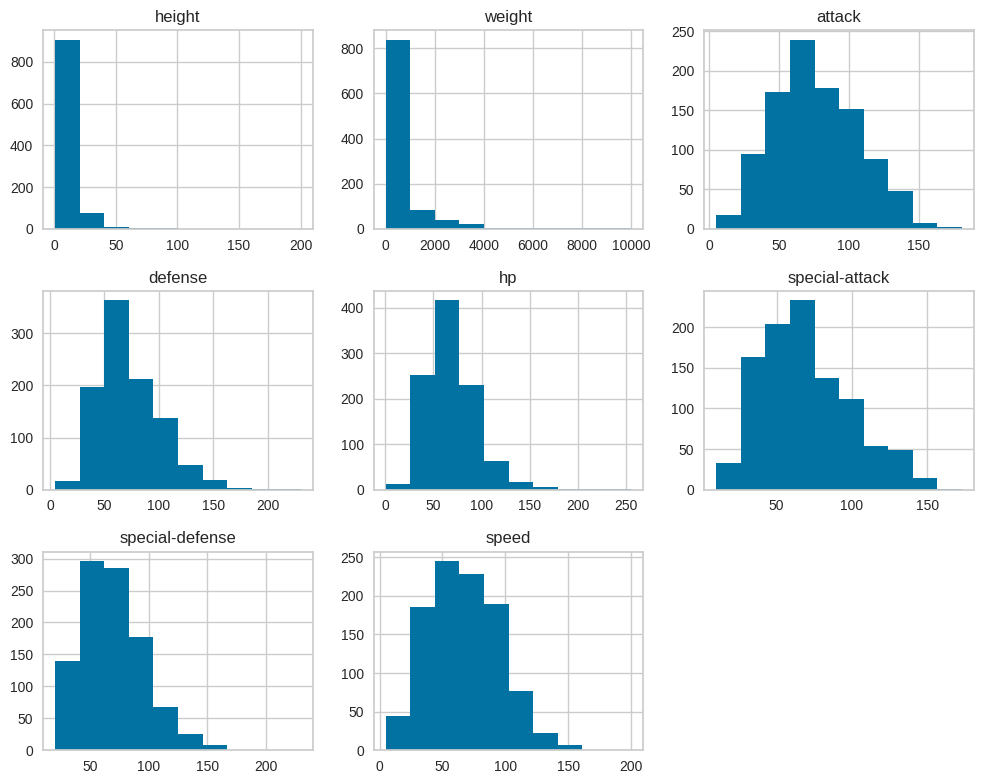

In [ ]:
import matplotlib.pyplot as plt
# Create subplots for each column
df2.drop(['id'],axis = 1).hist(figsize=(10, 8))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Through distribution analysis, we found most of the weight and height is severely left skewed. There are a few pokemons with extremely high weight and height. The stats are also a bit skewed, but not much.

Next, we will make boxplot to check whether there are outliers (extreme value).

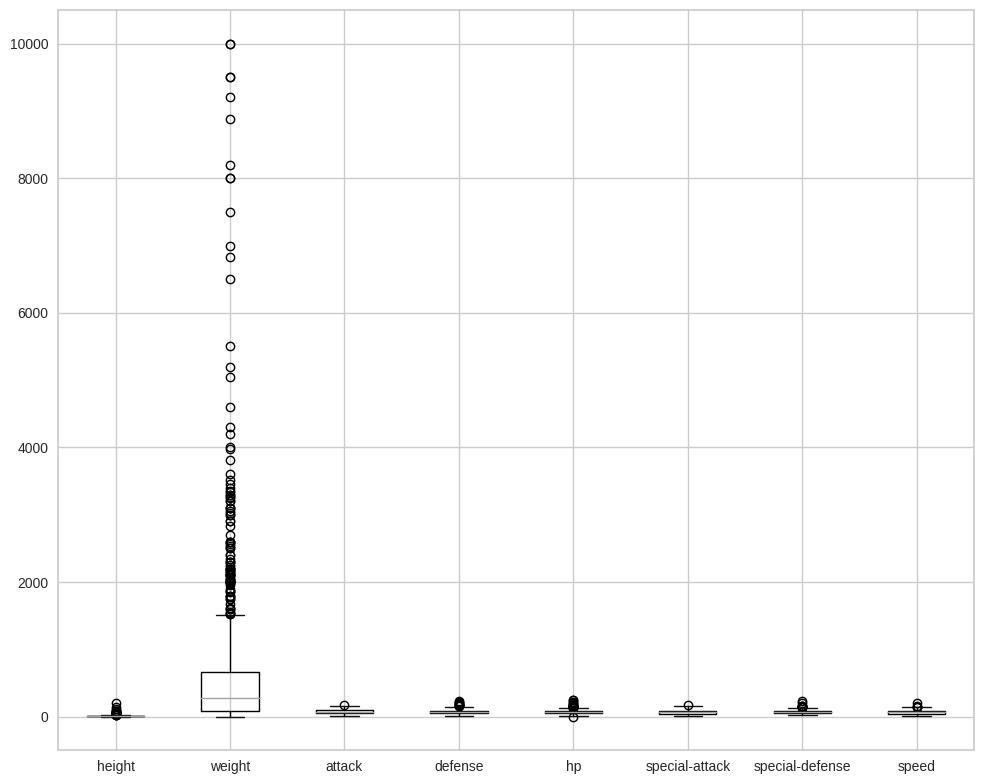

In [ ]:
# Create subplots for each column
df2.drop(['id'],axis = 1).boxplot(figsize=(10, 8))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Here we found that weight has much bigger value than the others, so we will separate the visualisation.

<Axes: >

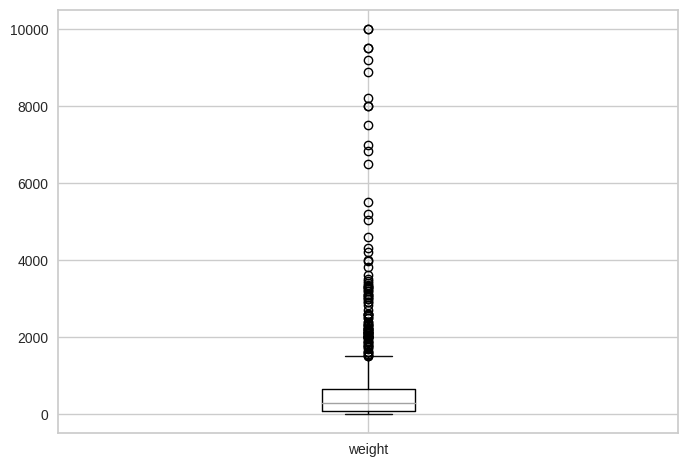

In [ ]:
df2.boxplot(['weight'])

There are some pokemon with weight above 2000 are special from others.

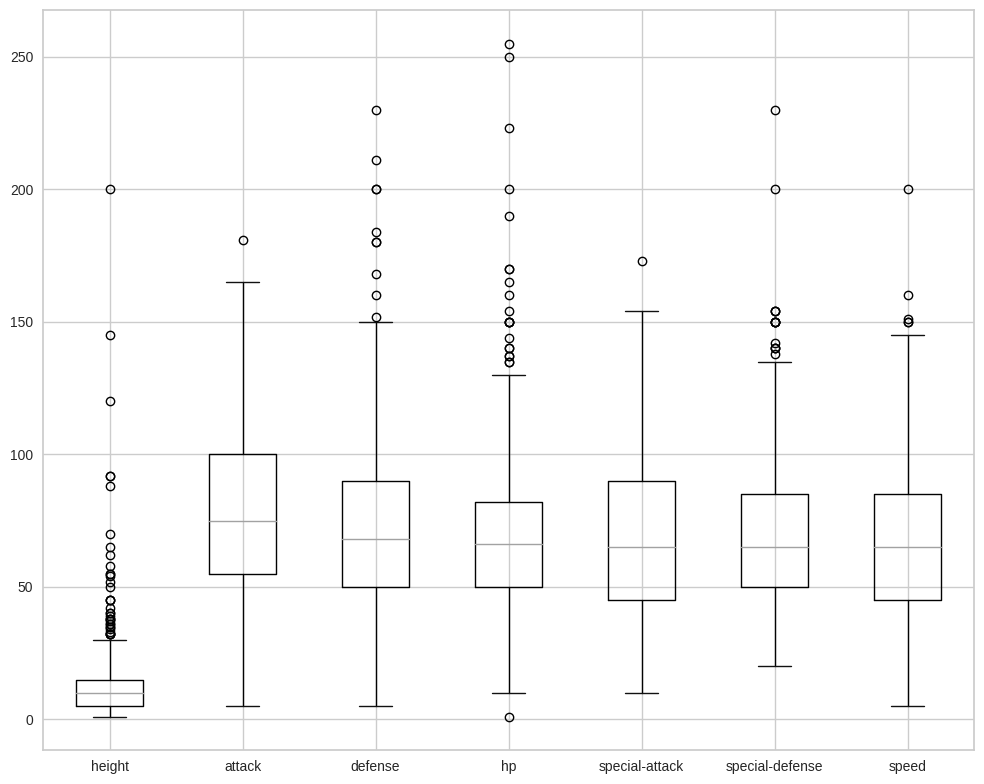

In [ ]:
# Create subplots for each column
df2.drop(['id','weight'],axis = 1).boxplot(figsize=(10, 8))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

For height, most of the pokemons are within 30. In terms of stats (abilities), hp has the least deviation, but with the most outliers (extremely high value). attack and speed have biggest deviation, but fewer outliers.

#### 5.3.3 Check the correlation

It is always nice to understand the relationships between varibales. We can visualise relationship using correlation matrix or pairplot.

In [ ]:
corr1 = df2.drop(['id','name','type_1','type_2'],axis = 1).corr()
corr1.style.background_gradient(cmap='coolwarm').format(precision=2)

Through the above correlation matrix, first we can see height and weight are slightly correlated with each other. Regarding stats, they are not very correlated with each other much. Hit point has strongest relationship with height, weight and attack. special-attack and special-defense are also slightly correlated. Speed has the strongest correlation with attack and special-attack. Defense is also most correlated with attack. Basically, we can see attack is quite important factor which can reflect some other stats like speed and defense at some points.

Next we will check the relationship between stats and types using df1.

In [ ]:
corr2 = df1.drop(['id','name'],axis = 1).corr()
corr2.style.background_gradient(cmap='coolwarm').format(precision=2)

Obviously the types and stats are not connected at all. However, we might argue that types data are all binary data and might not have enough samples. But it could be tricky if we want to use stats to predict types.

Next let's compute df2 by converting type name into numbers and then do the correlation matrix.

In [ ]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
df2['type_1_label'] = le.fit_transform(df2['type_1'])
df2['type_2_label'] = le.fit_transform(df2['type_2'])

df2.head()

id      name  height  weight  attack  defense  hp  special-attack  \
0  329   vibrava      11     153      70       50  50              50   
1  330    flygon      20     820     100       80  80              80   
2  337  lunatone      10    1680      55       65  90              95   
3  338   solrock      12    1540      95       85  90              55   
4  343    baltoy       5     215      40       55  40              40   

   special-defense  speed  type_1   type_2  type_1_label  type_2_label  
0               50     70  ground   dragon            10             2  
1               80    100  ground   dragon            10             2  
2               85     70    rock  psychic            15            14  
3               65     70    rock  psychic            15            14  
4               70     55  ground  psychic            10            14

In [ ]:
corr3 = df2.drop(['id','name','type_1','type_2'],axis = 1).corr()
corr3.style.background_gradient(cmap='coolwarm').format(precision=2)

Still not much correlation here, so it might not a good idea to predict type using stats. But our targets are categorical data and not necessarily need highly predictive variable. We will try later.

Optionally, we can also visualise the relationship and distribution using pairplot of all variables, but it could take long time whenwe have lots of columns.

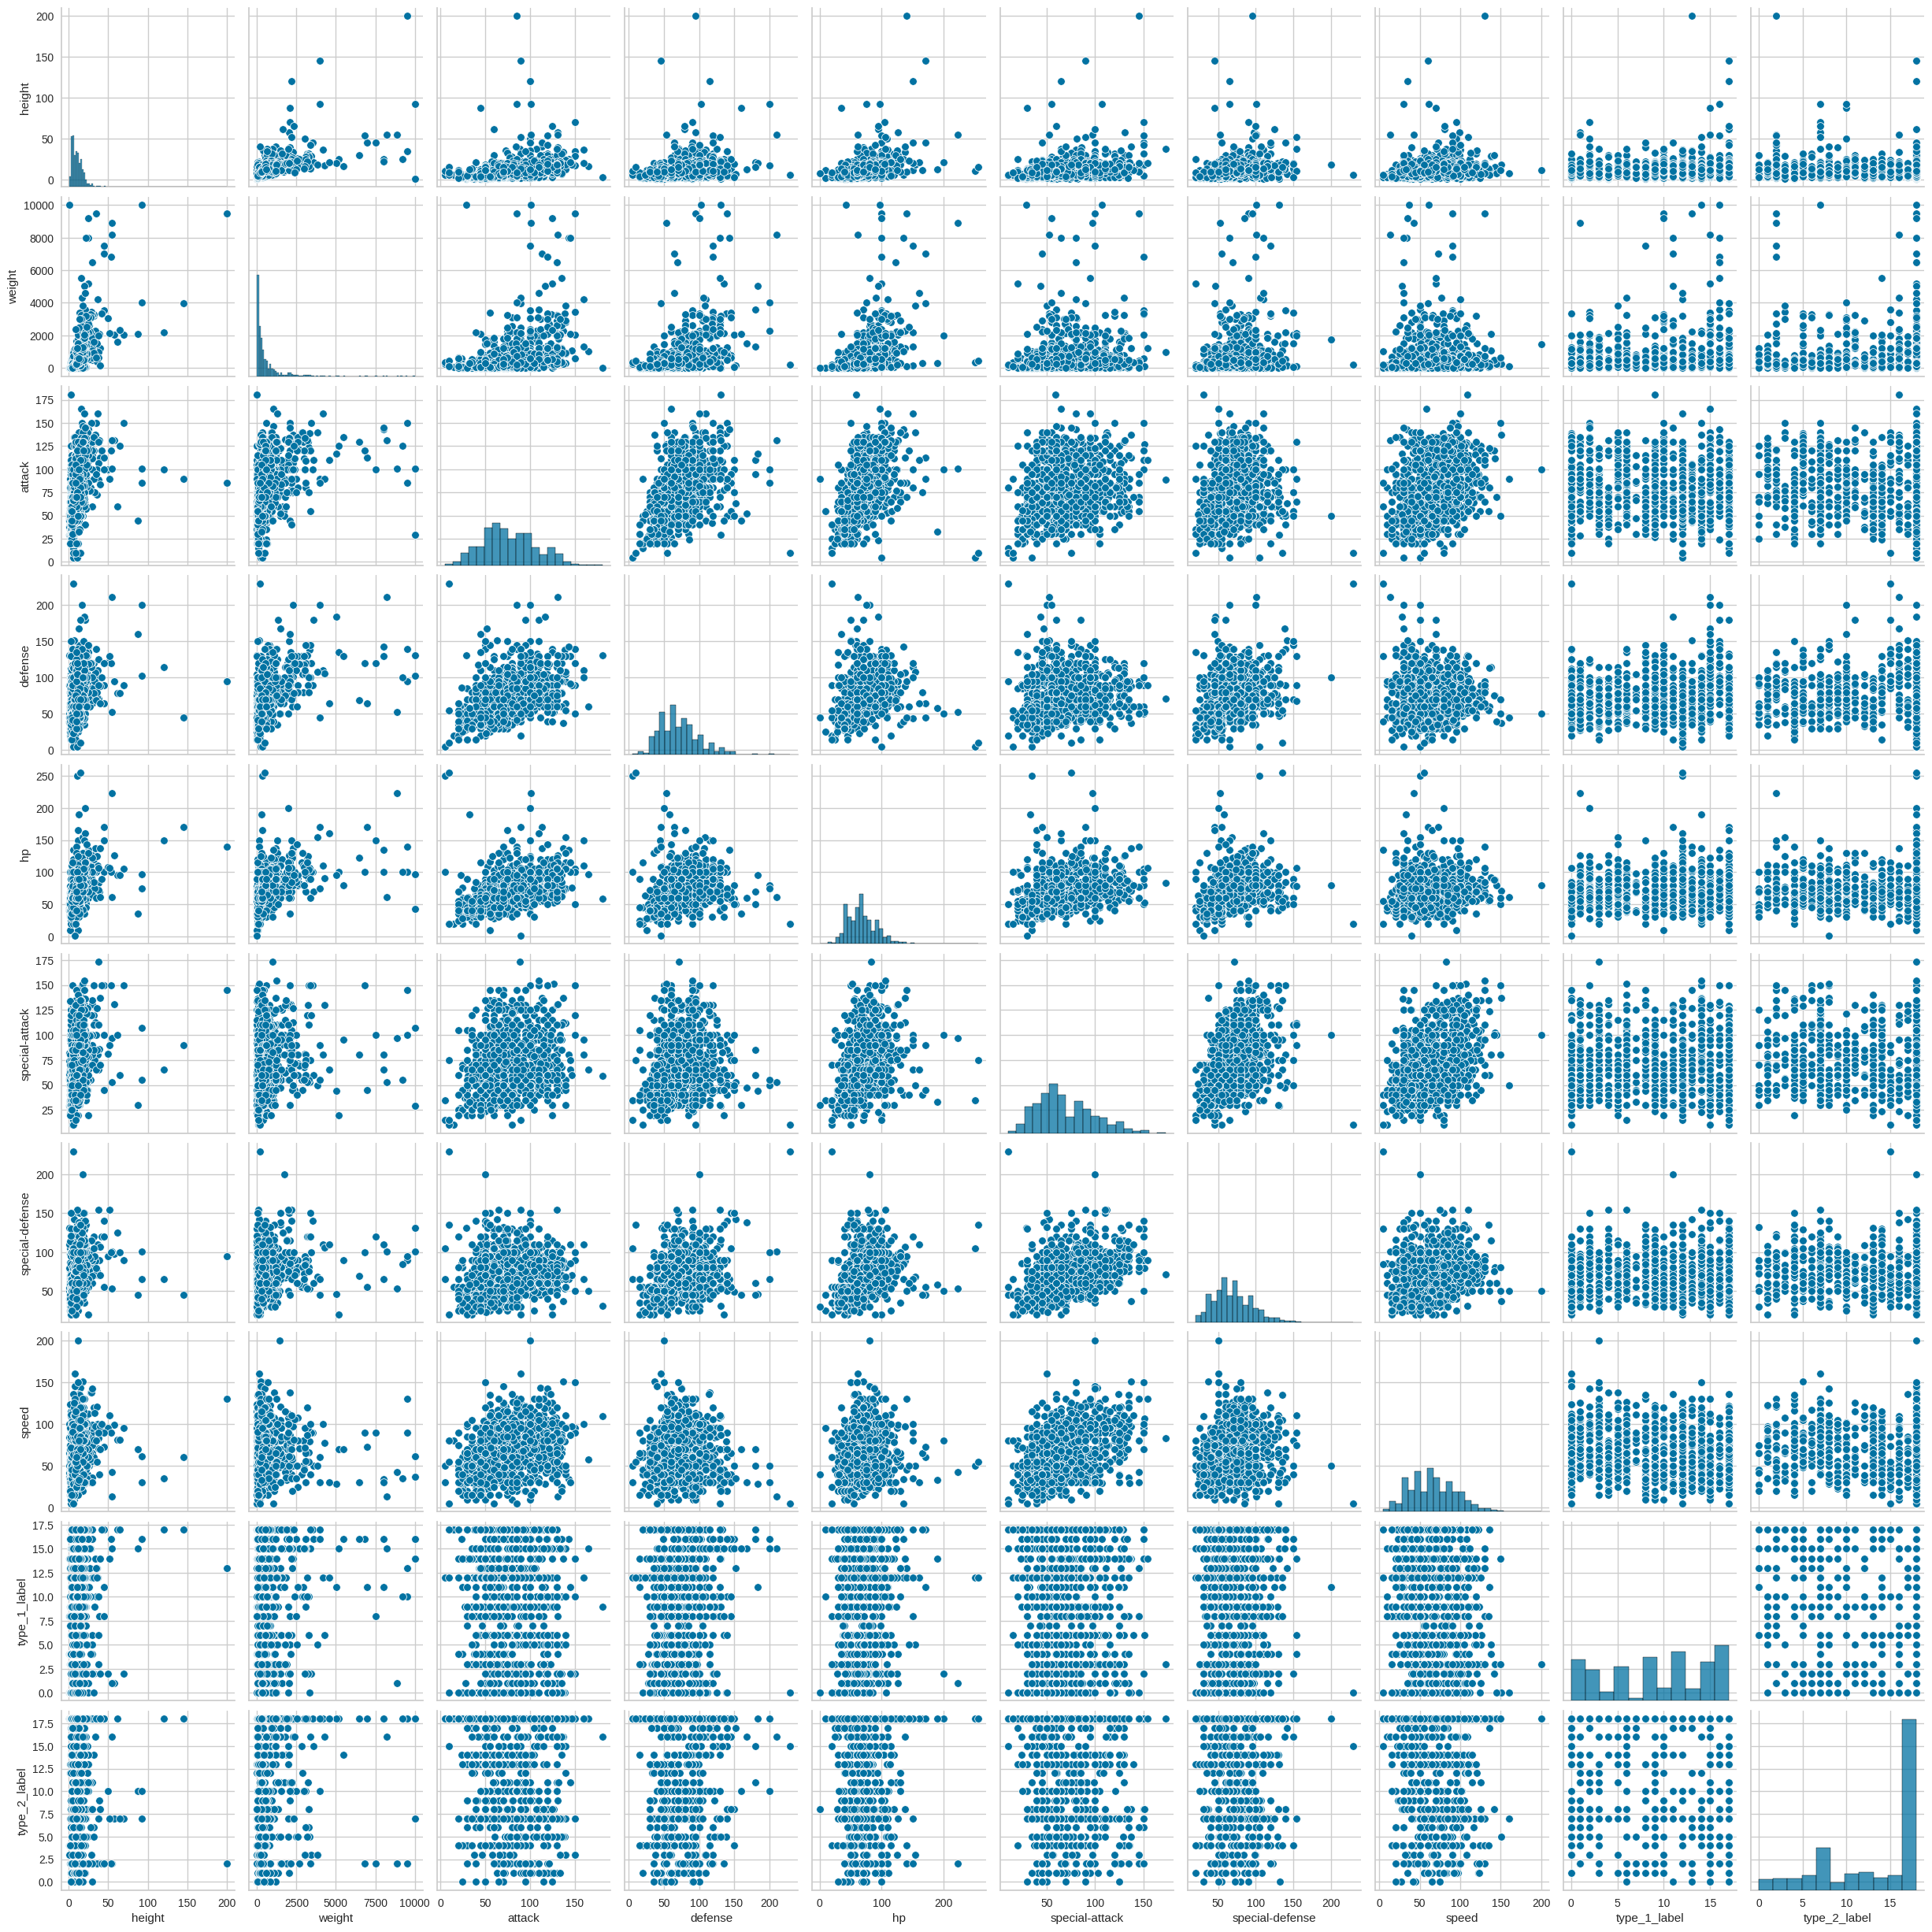

In [ ]:
import seaborn as sns
sns.pairplot(df2.drop(['id'],axis = 1))

#### 5.3.4 Variate analysis

Here we can take a look at the distribution of different types, to understand what the most common types in this dataset of pokemon.

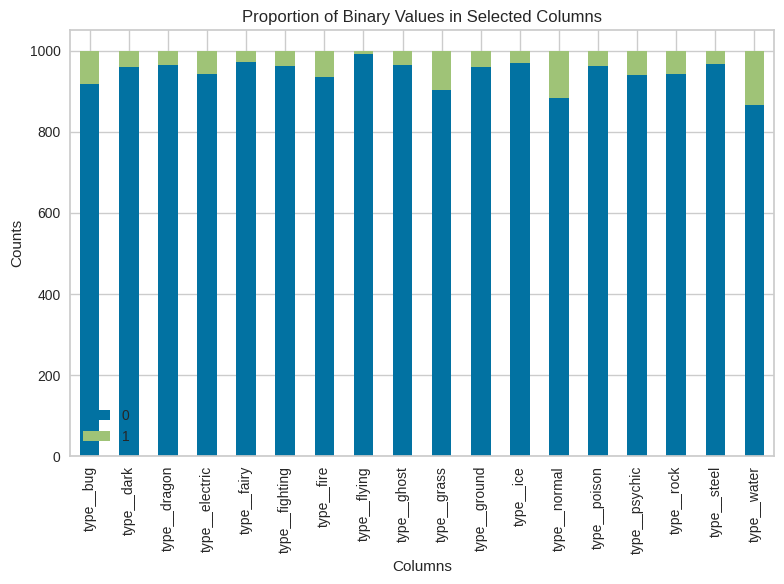

In [ ]:
type_col = df1.columns[df1.columns.str.startswith('type_')].tolist()

# Select the desired columns from the DataFrame
df_selected = df1[type_col]

# Count the number of 1s and 0s in each selected column
counts = df_selected.apply(pd.Series.value_counts)

# Transpose the counts DataFrame
counts_transposed = counts.transpose()

# Create a stacked bar chart
ax = counts_transposed.plot(kind='bar', stacked=True, figsize=(8, 6))

# Customize the chart
ax.set_xlabel('Columns')
ax.set_ylabel('Counts')
ax.set_title('Proportion of Binary Values in Selected Columns')
ax.legend(['0', '1'])

# Display the chart
plt.tight_layout()
plt.show()

Flying type seems the most common type for pokemon, while less pokemons are in normal, grass or water type.

### 5.4 Modelling

#### 5.4.1 Clustering

As mentioned above, the main complaint from the players is that they saw too many similar creatures and find the game boring in the end. In this scenario, we can try clustering to group the pokemons and then we can place different types of pokemons from different clusters, so that the players will experience more fun by seeing different creatures.

Our thought is to build clustering model based on stats and then check the most common types in each cluster.

There are different types of clustering algorithms, such as centroid-based clustering, density-based clustering, hierarchical clustering. To decide what clustering to use, we need to check how our data looks like.

Since we have multiple variables, we will reduce the data into two dimensions and then visualise the data in 2D chart.

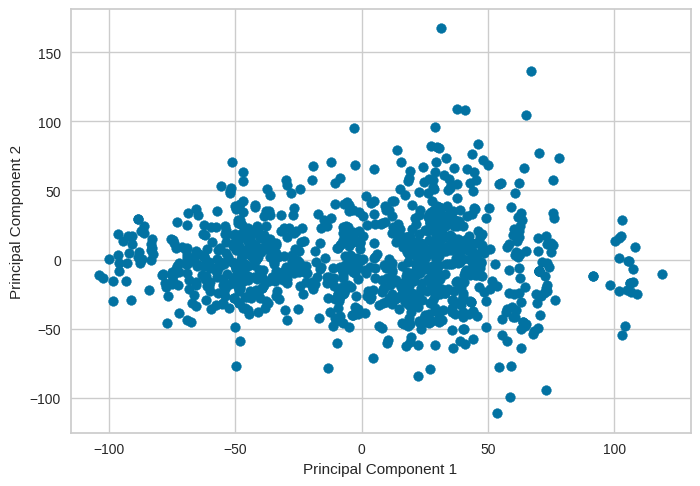

In [ ]:
# create a dataframe with the variable we would like to use for clustering
data = df2.drop(['id','name','height','weight','type_1','type_2','type_1_label','type_2_label'], axis = 1)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with multiple columns
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

From the above visualisation, we can see the data is not completely spherical and there are some overlaps and outliers. K-means might not be the best algorithms but we can try.

In [ ]:
"""
the KElbowVisualizer from yellowbrick is a tool to implements the “elbow” method to help data scientists
select the optimal number of clusters by fitting the model with a range of values for K (K is the number of clusters).
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
"""

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

"""
distortion: mean sum of squared distances to centers, i.e.the sum of the square distance between points in a cluster and the cluster centroid.
silhouette: mean ratio of intra-cluster and nearest-cluster distance. The value of the Silhouette score ranges from -1 to 1.
            silhouette_score = 1: Points are perfectly assigned in a cluster and clusters are easily distinguishable.
            silhouette_score = 0: Clusters are overlapping.
            silhouette_score = -1: Points are wrongly assigned in a cluster.
"""

'\ndistortion: mean sum of squared distances to centers, i.e.the sum of the square distance between points in a cluster and the cluster centroid.\nsilhouette: mean ratio of intra-cluster and nearest-cluster distance. The value of the Silhouette score ranges from -1 to 1.\n            silhouette_score = 1: Points are perfectly assigned in a cluster and clusters are easily distinguishable.\n            silhouette_score = 0: Clusters are overlapping.\n            silhouette_score = -1: Points are wrongly assigned in a cluster.\n'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

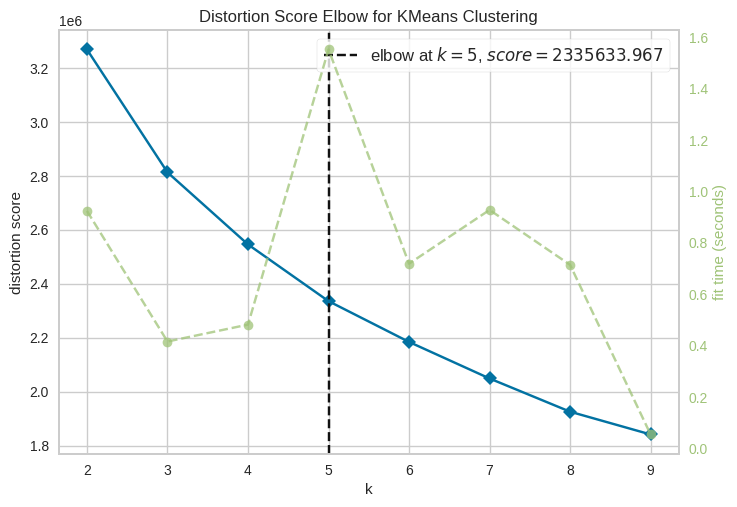

In [ ]:
"""
If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication
that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.
"""

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

# Standardize the data
#scaler = StandardScaler()
#data_scaled = scaler.fit_transform(data)

visualizer.fit(data)
visualizer.show()
plt.show()

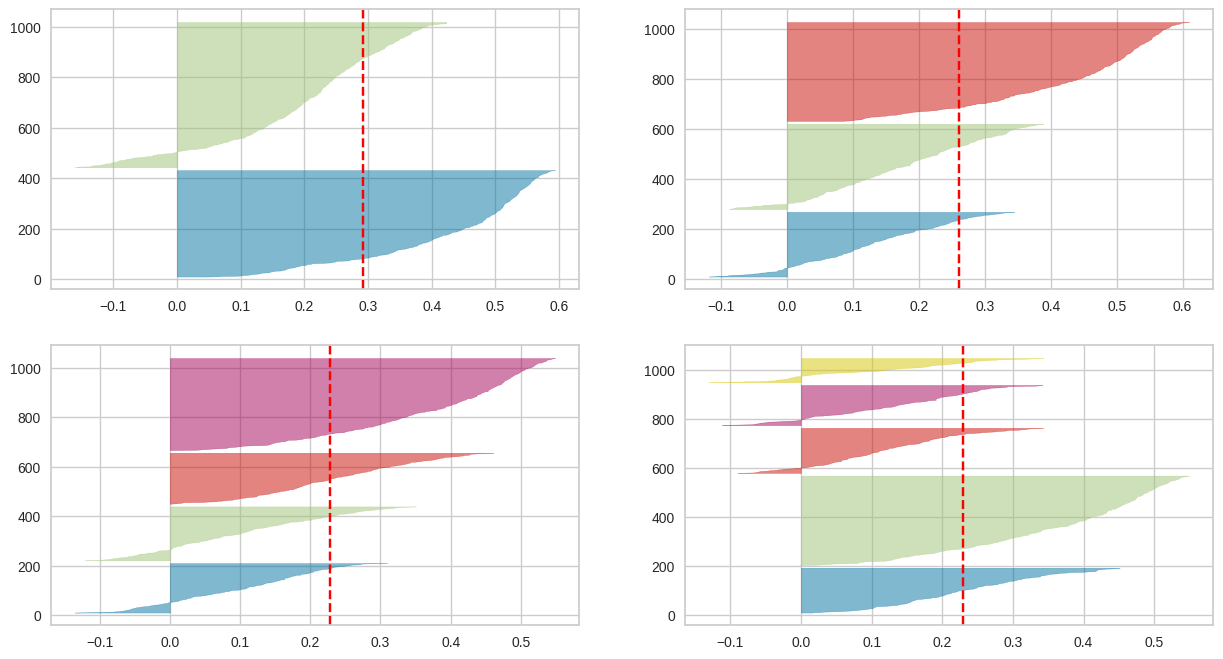

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


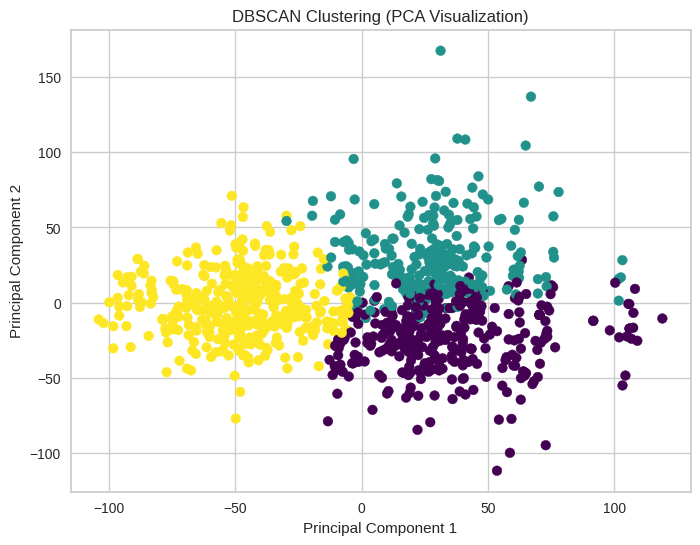

In [ ]:
import matplotlib.pyplot as plt

# Standardize the data
#scaler = StandardScaler()
#data_scaled = scaler.fit_transform(data)

# Apply KMeans clustering
kmeans_model = KMeans(n_clusters=3, random_state=3).fit(data)
clusters = kmeans_model.fit_predict(data)

# Perform PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering (PCA Visualization)')
plt.show()

In [ ]:
# here we add a column to the original dataframe to show predicted cluster for each pokemon
df2['Cluster'] = kmeans_model.predict(data)
df2.head()

id      name  height  weight  attack  defense  hp  special-attack  \
0  329   vibrava      11     153      70       50  50              50   
1  330    flygon      20     820     100       80  80              80   
2  337  lunatone      10    1680      55       65  90              95   
3  338   solrock      12    1540      95       85  90              55   
4  343    baltoy       5     215      40       55  40              40   

   special-defense  speed  type_1   type_2  type_1_label  type_2_label  \
0               50     70  ground   dragon            10             2   
1               80    100  ground   dragon            10             2   
2               85     70    rock  psychic            15            14   
3               65     70    rock  psychic            15            14   
4               70     55  ground  psychic            10            14   

   Cluster  
0        2  
1        0  
2        0  
3        1  
4        2

In [ ]:
# check the number of users allocated to each cluster
df2['Cluster'].value_counts()

Cluster
2    398
0    340
1    262
Name: count, dtype: int64

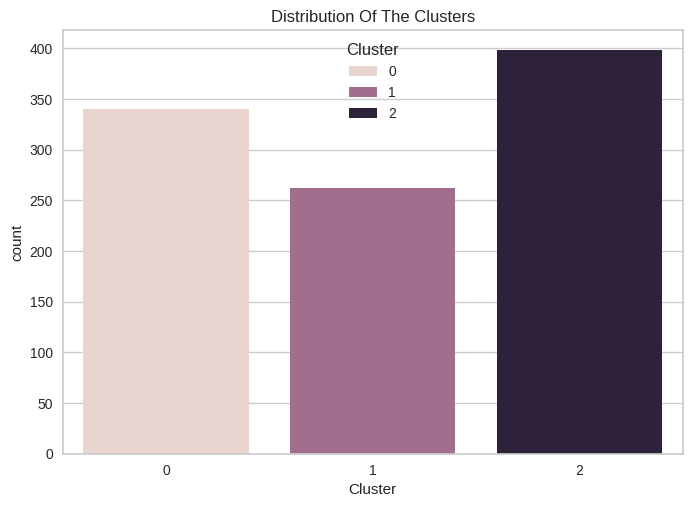

In [ ]:
import seaborn as sns

# visualise the number of users allocated to each cluster
pl = sns.countplot(x=df2["Cluster"],hue = df2["Cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
# return a table with mean of each feature for each cluster, so we can summarise the characteristics of each cluster
Clusters = df2.drop(['id','name','height','weight','type_1','type_2','type_1_label','type_2_label'], axis = 1).groupby('Cluster', as_index=False).agg("mean")
Clusters

Cluster     attack     defense         hp  special-attack  special-defense  \
0        0  86.244118   73.100000  80.191176       97.708824        83.997059   
1        1  99.335878  101.103053  84.679389       63.778626        80.641221   
2        2  54.515075   51.638191  50.819095       49.092965        50.201005   

       speed  
0  91.091176  
1  58.335878  
2  51.062814

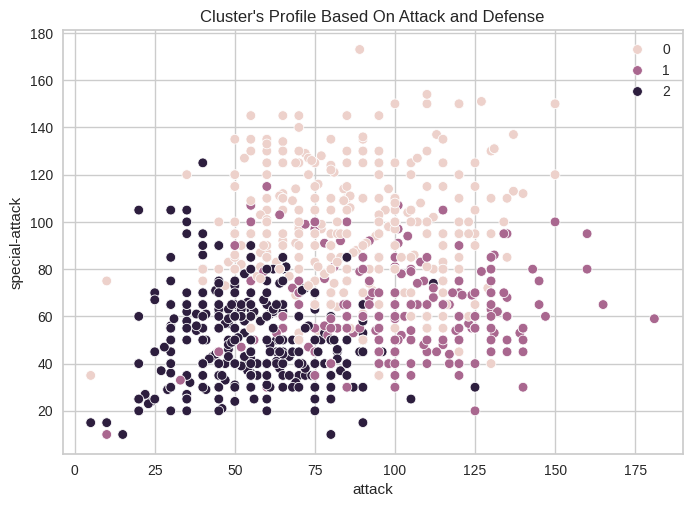

In [ ]:
# do some visualisation to better understand each cluster
# here we make a scatter plot to show total_spent and income distribution in each cluster
pl = sns.scatterplot(data = df2,x=df2["attack"], y=df2["special-attack"],hue=df2["Cluster"])
pl.set_title("Cluster's Profile Based On Attack and Defense")
plt.legend()
plt.show()

<Axes: xlabel='type_1'>

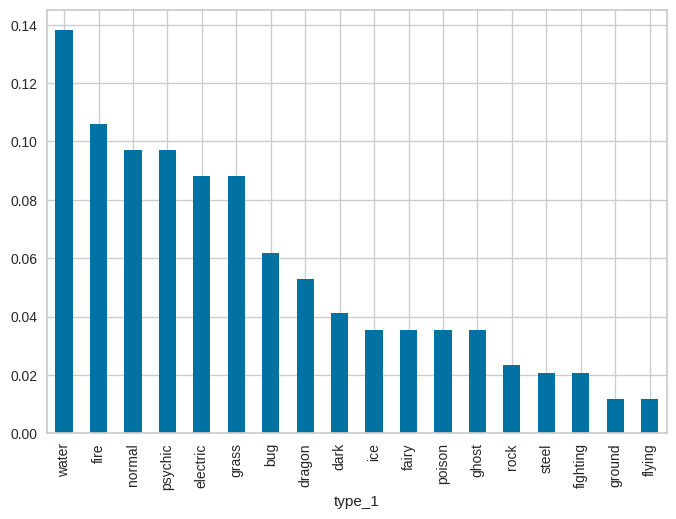

In [ ]:
df2[df2['Cluster']==0].type_1.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='type_1'>

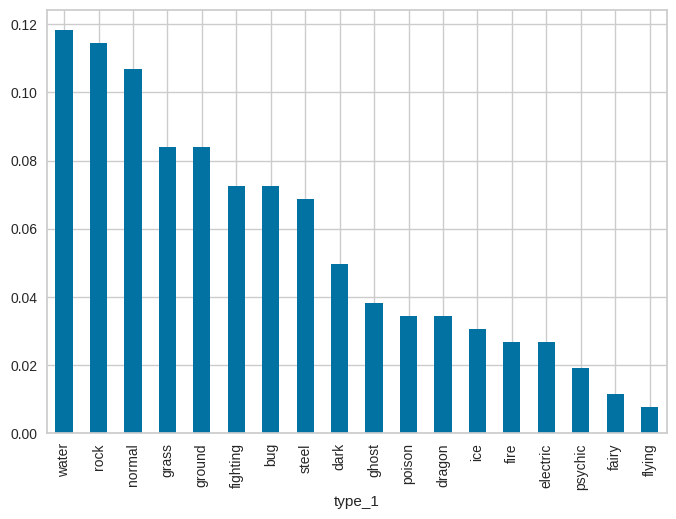

In [ ]:
df2[df2['Cluster']==1].type_1.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='type_1'>

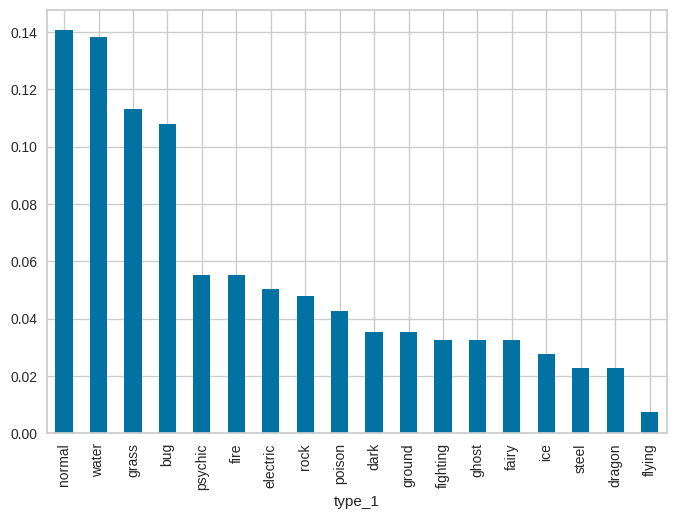

In [ ]:
df2[df2['Cluster']==2].type_1.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

In [ ]:
df2[df2['Cluster']==0].height.mean()

15.458823529411765

In [ ]:
df2[df2['Cluster']==1].height.mean()

16.603053435114504

In [ ]:
df2[df2['Cluster']==2].height.mean()

5.984924623115578

In [ ]:
df2[df2['Cluster']==0].weight.mean()

686.4941176470588

In [ ]:
df2[df2['Cluster']==1].weight.mean()

1342.057251908397

In [ ]:
df2[df2['Cluster']==2].weight.mean()

153.9924623115578

By building the clustering model and exploring the chracteristics of pokemons within each clusters, I think we found some different groups of pokemons. Next step is to test our results in the game. For example, we can start new placement strategies based on this model result, and then see whether the stay rate is improving. If not, we will collect more data to better modelling, and of course we can change the algorithms and rebuild our model. As we mentioned, the algorithm we selected might not be the best one and this is just a pilot project, we still have room to improve.

Model, tune, test, tune, test...This is usually how we build machine learning model.

Until here, you have experienced the full data analytics lifecyle in Google Cloud. Pretty cool, right? Hope you enjoy this lab.

Feel free to build your own project!

## **Thank you!**